# Data Modeling

## Fitting a line

AKA Linear Regression

We are going to start with something that should be familiar: correlation coefficients and fitting a line.   


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import patches
%matplotlib inline
from sklearn.metrics import mean_squared_error
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [2]:

# Generate some data. 
np.random.seed(42)

#Choose x randomly and uniformly from 0 to 10,
x = np.random.uniform(0, 10, 100)
#draw 100 numbers from from a gaussian distribiution with a stadard deviation of 4
noise = np.random.randn(100) * 4
#create a simply linear model for our demo y values
y = 1.5 * x + noise

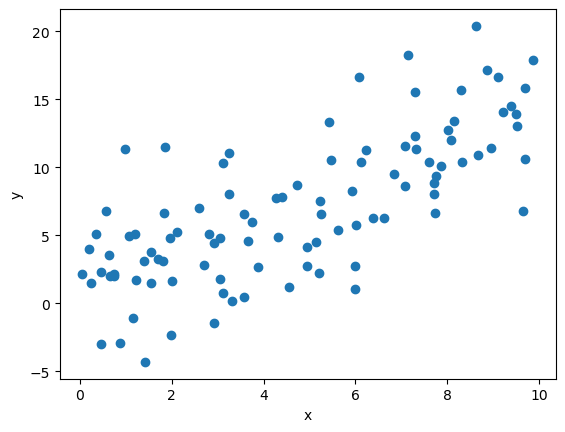

In [3]:
plt.figure()
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y');

You have learned about the **correlation coefficient** $r$, which is a measure of the strength of the linear relationship between the two variables.


First, let's convert the data (stored in the arrays `x` and `y`) to standard units or a **Z score**.  To convert a set of data points to standard units, we subtract out the mean of the data and scale by the standard deviation. This has the effect of changing the data so that the data in standard units have mean 0 and  standard deviation 1. Below we construct a function that does this.

$$
Z = \dfrac{x - \mu_x}{\sigma_x}
$$

For our convenience later.  Let's make the Z score calculation into a function:

In [4]:

def standard_units(x):
    return (x - np.mean(x)) / np.std(x)


In [5]:
#Now let's convert our data into z scores
x_standard = standard_units(x)
y_standard = standard_units(y)

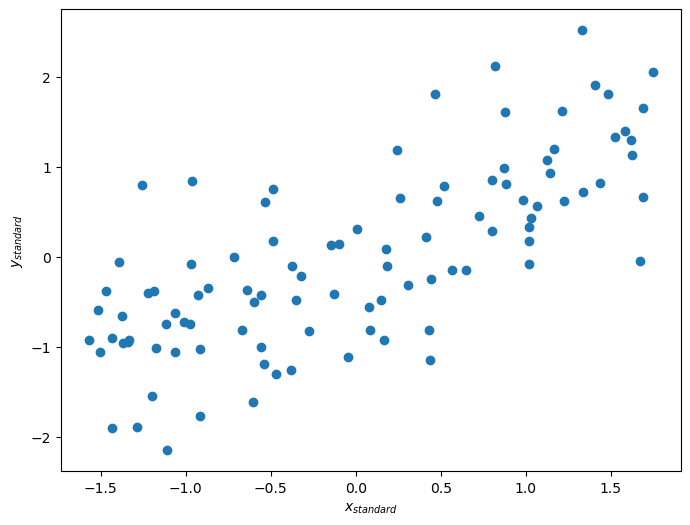

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(x_standard, y_standard)
plt.xlabel('$x_{standard}$')
plt.ylabel('$y_{standard}$');

The plot looks the same as before, except now the axes are scaled such that we measure $x$ and $y$ in standard units. 

Now, a crazy thing is that the correlation coeffiecient $r$ is calculated as just the mean of the product of two variables, when the variables are measured in standard units! Below we define a function that calculates $r$, assuming that the inputs have already been converted to standard units.

In [7]:
def correlation(array1, array2):
    return np.mean(array1 * array2)

The correlation between these two variable can now be calculated through this function:

In [8]:
correlation(x_standard, y_standard)

0.7351364076052976

In [9]:
#We can use numpy function corrcoef() to get the correlation
np.corrcoef(x,y)

array([[1.        , 0.73513641],
       [0.73513641, 1.        ]])

In [10]:

correlation_matrix = np.corrcoef(x,y)
r = correlation_matrix[0,1]
print(r)

0.7351364076052977


We can use $r$ to form a line called a *regression line*, or *best fit line* which makes predictions for $y$ given some $x$. Our prediction for $y$ in standard units is $r \cdot x$. If we want to fit this regression line in the original units, recall that the slope of this line is given by

$$
\text{slope} = r \cdot \dfrac{\hat{\sigma}_y}{\hat{\sigma}_x}
$$

and the intercept is given by

$$
\text{intercept} = \hat{\mu}_y - \text{slope} \cdot \hat{\mu}_x
$$

where $\hat{\sigma}_x$ is the observed standard deviation of a variable $x$ and $\hat{\mu}_x$ is the observed mean. Our regression line will have the form

$$
y = \hat{\alpha} + \hat{\beta} x
$$

where $\hat{\alpha}$ is the intercept from above and $\hat{\beta}$ the slope.

Below we plot this line.

In [11]:
r = correlation(x_standard, y_standard)
slope = r * np.std(y) / np.std(x)
intercept = np.mean(y) - slope * np.mean(x)

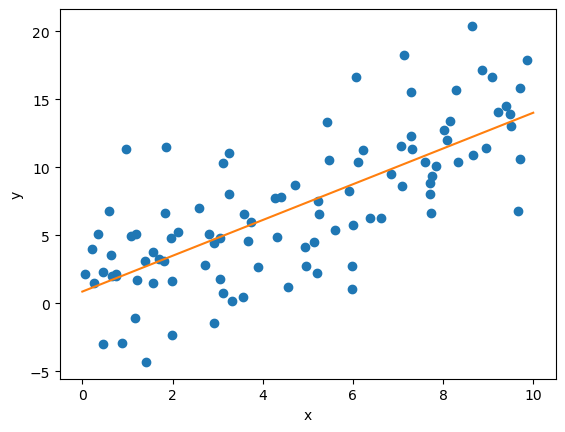

In [12]:
plt.scatter(x, y)

#Use the equation of a line to draw the line
fitLineX = np.linspace(0, 10)
fitLineY = slope * np.linspace(0, 10) + intercept

plt.plot(fitLineX, fitLineY, color='tab:orange')
plt.xlabel('x')
plt.ylabel('y');

## Introduction to scikit-learn for Regression

Ok.  That was a bit of a faff.  But now that you understand how to manually calculate the slope and intercept and draw a line. Next we can introduce a python package called `scikit-learn`, which can be used to fit a wide variety of statistical and machine learning models.  It is an extremely powerful package.  With a very well thought out interface that enables scaling to larger problems and more complicated methods straightforward.    




In [13]:
#sklearn is the name of scikit-learn package.   It is very large, and does a lot of things
#So here we are just going to import the linear_model part as lm.  
from sklearn import linear_model as lm

With this linear_model package, we can fit a wide variety of regression models, but as stated before, the focus of this will be "Ordinary Least Squares" (OLS) regression. The first thing we need to do is to fit the model based on our data. `lm.fit()` takes two arguments: the first is what’s called a “design matrix,” or X, and the second is the vector of true values, or y.

A design matrix ‘X’ is essentially a table containing all of the predictor values, with a row for each data point, and a column for each variable being used for prediction. In the case of single variable regression, the design matrix will only have one column, but it’s important to keep in mind that the `.fit` method will only accept a table or pandas DataFrame, rather than an array or Series. 

The vector of true values is just that— an array or Series containing the true y values of the variable we want to predict. This should always be a single column.


A warning that this way is overcomplicated for our single line goal.   But provides a groundwork and easier utilization for future more complicated scenarios. 

In [14]:
model1 = lm.LinearRegression()
#This line will give an error for 1d arrays.   
#This is an important think because it's a scary error.  But easy to fix.  

model1.fit(x,y)

ValueError: Expected 2D array, got 1D array instead:
array=[3.74540119 9.50714306 7.31993942 5.98658484 1.5601864  1.5599452
 0.58083612 8.66176146 6.01115012 7.08072578 0.20584494 9.69909852
 8.32442641 2.12339111 1.81824967 1.8340451  3.04242243 5.24756432
 4.31945019 2.9122914  6.11852895 1.39493861 2.92144649 3.66361843
 4.56069984 7.85175961 1.99673782 5.14234438 5.92414569 0.46450413
 6.07544852 1.70524124 0.65051593 9.48885537 9.65632033 8.08397348
 3.04613769 0.97672114 6.84233027 4.40152494 1.22038235 4.9517691
 0.34388521 9.09320402 2.58779982 6.62522284 3.11711076 5.20068021
 5.46710279 1.84854456 9.69584628 7.75132823 9.39498942 8.9482735
 5.97899979 9.21874235 0.88492502 1.95982862 0.45227289 3.25330331
 3.8867729  2.71349032 8.28737509 3.56753327 2.8093451  5.42696083
 1.40924225 8.02196981 0.74550644 9.86886937 7.72244769 1.98715682
 0.05522117 8.15461428 7.06857344 7.29007168 7.71270347 0.74044652
 3.58465729 1.1586906  8.63103426 6.23298127 3.30898025 0.6355835
 3.10982322 3.25183322 7.29606178 6.37557471 8.87212743 4.72214925
 1.19594246 7.13244787 7.60785049 5.61277198 7.7096718  4.93795596
 5.22732829 4.27541018 0.25419127 1.07891427].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [15]:
# This is one of those stupid coding things. 1-d arrays are different from 2-d arrays with single column
# Annoying. 
# the reshape method is used to change the shape of an array or matrix
# the first param of -1 means each row becomes its own array, and the second param of 1 
# means there is one total column, which is what we want for our single feature in x
# THis makes the 1-d array x (100,)  into a "2d" array with only a single column(100,1)

# Generate some data. 
np.random.seed(42)

#Choose x randomly and uniformly from 0 to 10,
x = np.random.uniform(0, 10, 100)
#draw 100 numbers from from a gaussian distribiution with a stadard deviation of 4
noise = np.random.randn(100) * 4
#create a simply linear model for our demo y values
y = 1.5 * x + noise

#Note that the shpae is first (100,)  or "1-d"
print(x.shape)
x=x.reshape(-1, 1)
#After reshaping it's (100,1) or  "2-d "
print(x.shape)

(100,)
(100, 1)


In [16]:
#Another way to solve this problem is to use pandas dataframes:
#You will likely be working with dataframes anyway.  

#pd.DataFrame() turns the array into a dataframe
xdf = pd.DataFrame(x)
ydf = pd.DataFrame(y)
model1.fit(xdf,ydf)

LinearRegression()

In [17]:
#But you usually have 1 dataframe with multiple columns


#Make a dataframe use the dictionary method labeling the x and y columns
#THIS LINE GIVES AN ERROR
#Again it's a dimension issue.  But now it's the opposit x is 2d and it wants 1d.   ARGHH! 
df = pd.DataFrame({'x': x, 'y':y})

ValueError: Per-column arrays must each be 1-dimensional

In [18]:
#One way to get wround this is to first make dataframes than concatenate them.
#pd.DataFrame() turns the array into a dataframe. 
#THis will handle both 1d and 2d arrays. 
#Note the use of the columns parameter to label the columns
xdf = pd.DataFrame(x, columns=['x'])
ydf = pd.DataFrame(y, columns=['y'])

#Now concatenate the dataframes and but the concatented result into df
#Note the use of axis=1 to concatenate along the columns
df = pd.concat([xdf,ydf], axis=1)
df


,x,y
0,3.745401,5.966290
1,9.507143,13.064685
2,7.319939,11.346952
3,5.986585,1.029602
4,1.560186,1.461592
...,...,...
95,4.937956,4.143693
96,5.227328,7.532586
97,4.275410,7.777723
98,0.254191,1.488050


In [19]:


#THIS LINE GIVES AN ERROR
#for a similiar reason as to above,  using df['Column'] is a "series" not a "dataframe"
model1.fit(df['x'],df['y'])


ValueError: Expected 2D array, got 1D array instead:
array=[3.74540119 9.50714306 7.31993942 5.98658484 1.5601864  1.5599452
 0.58083612 8.66176146 6.01115012 7.08072578 0.20584494 9.69909852
 8.32442641 2.12339111 1.81824967 1.8340451  3.04242243 5.24756432
 4.31945019 2.9122914  6.11852895 1.39493861 2.92144649 3.66361843
 4.56069984 7.85175961 1.99673782 5.14234438 5.92414569 0.46450413
 6.07544852 1.70524124 0.65051593 9.48885537 9.65632033 8.08397348
 3.04613769 0.97672114 6.84233027 4.40152494 1.22038235 4.9517691
 0.34388521 9.09320402 2.58779982 6.62522284 3.11711076 5.20068021
 5.46710279 1.84854456 9.69584628 7.75132823 9.39498942 8.9482735
 5.97899979 9.21874235 0.88492502 1.95982862 0.45227289 3.25330331
 3.8867729  2.71349032 8.28737509 3.56753327 2.8093451  5.42696083
 1.40924225 8.02196981 0.74550644 9.86886937 7.72244769 1.98715682
 0.05522117 8.15461428 7.06857344 7.29007168 7.71270347 0.74044652
 3.58465729 1.1586906  8.63103426 6.23298127 3.30898025 0.6355835
 3.10982322 3.25183322 7.29606178 6.37557471 8.87212743 4.72214925
 1.19594246 7.13244787 7.60785049 5.61277198 7.7096718  4.93795596
 5.22732829 4.27541018 0.25419127 1.07891427].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [20]:
#Here is the problem line:
#model1.fit(df['x'],df['y'])

#Here are two identical ways to solve the problem.  These are just different syntax to do the same thing.

#One way to fix this is to pass in not a single string.  But make the string into a list by using extra []
#not the extra [] around the x and y
model1.fit(df[ ['x'] ],df[ ['y'] ])

#ANother way to fix this is to explicitly turn the series back into a dataframe with the to_frame() function. 
model1.fit(df[ 'x' ].to_frame(),df[ 'y' ].to_frame())

LinearRegression()

In [21]:
#Ok.  Now bake to model fitting.  

# assign model to a variable 
model1 = lm.LinearRegression()

# fit model based on data)
model1.fit(x, y)

LinearRegression()

Ok.  Yeah. All that seemed boring.  What did we actually do d

It changed the "model1" variable and added a linear regression. 

Now that we have a linear regression model fitted, let’s check out the coefficients to see if they match up with our manually calculated values. 



This is the slope you calculated manually along with the slope calculate by sklearn:

In [22]:
print('Slope: ', slope)
print('sklearn Slope: ', model1.coef_[0])

Slope:  1.3160907091507872
sklearn Slope:  1.3160907091507872


We can check the intercepts as well:

In [23]:
print('Intercept: ', intercept)
print('sklearn Intercept: ', model1.intercept_)

Intercept:  0.8603846301869931
sklearn Intercept:  0.8603846301869931


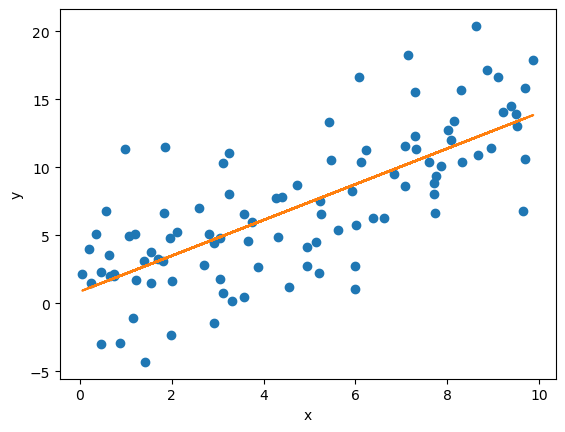

In [24]:
plt.scatter(x, y)

#Now use the model we fit to draw the line
#Note that this works by taking are input x and using the model1 we fit with linear regression to predict a y
yFit = model1.predict(x)
plt.plot(x, yFit, color='tab:orange')
plt.xlabel('x')
plt.ylabel('y');

To generate the data above, we started with some range of $x$ values, and generated $y$ as a linear function of $x$ with some random noise added in. Take a look:

In [25]:
np.random.seed(42)
x = np.random.uniform(0, 10, 100)
noise = np.random.randn(100) * 4
y = 1.5 * x + noise

Notice how I defined $y$:

$$
y = 1.5 \cdot x + u
$$

where $u$ is some normally-distributed random noise whose average is 0. So, while there is some randomness to the data, on average the "true" slope of the relationship is 1.5. Yet we predicted it to be roughly 1.3!

This highlights the following fact: Suppose we have some random data that we believe has a linear relationship. The least-squares slope we generate from the data is an *estimate* of the "true" slope of that data. Because of this, the estimated slope is a random variable that depends on the data we happen to have.

To highlight this fact, let's repeat the procedure above but with a different [random seed](https://en.wikipedia.org/wiki/Random_seed), in order to get data with the same underlying relationship but different values.

In [26]:
np.random.seed(189)
x = np.random.uniform(0, 10, 100)
noise = np.random.randn(100) * 4
y = 1.5 * x + noise

r = correlation(x_standard, y_standard)
slope = r * np.std(y) / np.std(x)
intercept = np.mean(y) - slope * np.mean(x)

In [27]:
# once again, we can do this process with sklearn

model2 = lm.LinearRegression()
model2.fit(x.reshape(-1, 1), y)

LinearRegression()

Slope:  1.5590151265266385
sklearn Slope:  1.604051841035063


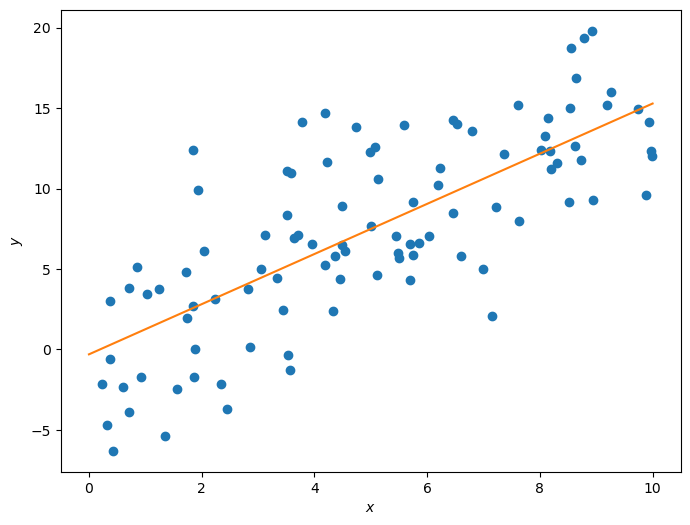

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(x, y)
plt.plot(np.linspace(0, 10), slope * np.linspace(0, 10) + intercept, color='tab:orange')
plt.xlabel('$x$')
plt.ylabel('$y$');
print('Slope: ', slope)
print('sklearn Slope: ', model2.coef_[0])

Now the estimated slope is roughly 1.6, even though the underlying data was still generated using a slope of 1.5. This just like statistics you've done. 

Keep in mind, however, that correlation in data *does not* imply causation. In this example we know the true causal relationship between $x$ and $y$ because we defined it ourselves. However, when using real data you do not see the "true" relation and thus cannot conclude causality from correlation. It could simply be that both your variables depend on an unseen third variable and have no causal effect on one another. Or even worse, while unlikely it could be the case that slight linear trends in two variables is a complete coincidence.

## Root-Mean-Squared Error

You've encountered these concepts before in different ways (e.g. ANOVA, line of "best" fit).  This way here is how these concepts are typically thought of from machine learning or data science viewpoint.  In this context there's the idea of a **loss function**.  


While we can arbitrarily pick $\hat{\alpha}$ and $\hat{\beta}$ values, we do want to pick the values that help predict $\hat{y}$ that are closest to actual $y$ values. To achieve this, we want to minimize a **loss function** that quantifies how far off our prediction $\hat{y}$ is from $y$ for some known data points. One of the most common loss functions is called the **root-mean-squared error**, and is defined as

$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^n \left ( y_i - \hat{y}_i \right ) ^2 }
$$

where $n$ is the number of observations. The effect of this is to take the mean of the distance of each value of $\hat{y}$ from its corresponding value in $y$; squaring these values keeps them positive, and then we take the square root to correct the units of the error.

Plugging in the formula $\hat{y}$ in RMSE formula, we get,

$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^n \left ( y_i - (\hat{\alpha} + \hat{\beta}x_i) \right ) ^2 }
$$

We want to pick $\hat{\alpha}$ and $\hat{\beta}$ that minimize this formula. Recall from calculus that to find the minimum of a function, we take its first derivative, set that expression equal to 0, and solve for some variable. The process is the same here, although there are two variables we are solving for. By doing a bit of calculus, we get the following formulas for $\hat{\alpha}$ and $\hat{\beta}$

$$\Large
\hat{\beta} = r\frac {\hat{\sigma}_y} {\hat{\sigma}_x} \qquad \qquad
\hat{\alpha} = \hat{\mu}_y - \hat{\beta}\hat{\mu}_x
$$

where $r$ is the **correlation** between $x$ and $y$, $\hat{\sigma}_y$ is the standard deviation of $y$, $\hat{\sigma}_x$ is the standard deviation of $x$, $\hat{\mu}_y$ is the average of all our $y$ values, and $\hat{\mu}_x$ is the average of all our $x$ values. (As an aside, note the hats on our $\sigma$'s and $\mu$'s; this is because these are _empirical estimates_ of the parameters of these distributions, rather than the true values.) These are the same values we had above!

Note that our formula for $\hat{\beta}$ involves the **correlation coefficient** $r$ of $x$ and $y$. The correlation coefficient of two variables is a measure of the strength of a linear relationship between them. $r$ goes from -1 to 1, where $|r|=1$ is a perfect linear relationship and $r=0$ is no linear relationship. The formula for $r$ is

$$
r = \frac{1}{n}\sum^n_{i=1} \left ( \frac{x_i - \hat{\mu}_x}{\hat{\sigma}_x} \right ) \left ( \frac{y_i - \hat{\mu}_y}{\hat{\sigma}_y} \right )
$$

(Note: the form $\frac{x_i - \hat{\mu}_x}{\hat{\sigma}_x}$ of a variable $x$ is it's representation in standard units, as mentioned above.)

To calculate the RMSE, we will write an `rmse` function that makes use of sklearn's `mean_squared_error` function.

In [29]:
def rmse(target, pred):
    return np.sqrt(mean_squared_error(target, pred))

## Gaining a graphical intuition

To get a better idea of what the RMSE represents, the figures below show a small dataset, a proposed regression line, and the squared error that we are summing in the RMSE. The data points are

| $x$ | $y$ |
|-----|-----|
| 0 | 1 |
| 1 | .5 |
| 2 | -1 |
| 3 | 2 |
| 4 | -3 |


In [30]:
#Create a small dataframe to hold the data
d = pd.DataFrame({
    'x': [0,  1,  2,  3,  4],
    'y': [1, .5, -1,  2, -3]})

#Create a function that plots a line with slope and intercept
def plot_line_and_errors(slope, intercept):
    print("RMSE:", rmse(slope * d['x'] + intercept, d['y']))
    #create a figure
    plt.figure(figsize=(5,5))
    
    #choose the start and end points of the line. 
    points = np.array([-2,7])
    #plot a line with x vales from points and the y values from the line parameters
    p = plt.plot(points, slope*points + intercept, color='orange', label='Proposed line')
    #get a handle that identifies where the line was plotted
    ax = p[0].axes
    
    #Calculate the predicted y values from the line
    predicted_ys = slope * d['x'] + intercept
    #get the difference. 
    diffs = predicted_ys - d['y']

    #loop through the rows of the dataframe "d"
    for i in np.arange(d.shape[0]):

        x = d['x'][i]
        y = d['y'][i]
        diff = diffs[i]
        
        if diff > 0:
            bottom_left_x = x
            bottom_left_y = y
        else:
            bottom_left_x = x + diff
            bottom_left_y = y + diff
        
        # ax.add_patch(patches.Rectangle(make_array(bottom_left_x, bottom_left_y), abs(diff), abs(diff), color='red', alpha=.3, label=('Squared error' if i == 0 else None)))
        # plt.plot(make_array(x, x), make_array(y, y + diff), color='red', alpha=.6, label=('Error' if i == 0 else None))
        # A "patch" is added to make a rectangle
        ax.add_patch(patches.Rectangle(np.array([bottom_left_x, bottom_left_y]), abs(diff), abs(diff), color='red', alpha=.3, label=('Squared error' if i == 0 else None)))
        # add a red line to indicate the error from the data point to the predicted y avlue
        plt.plot(np.array([x, x]), np.array([y, y + diff]), color='red', alpha=.6, label=('Error' if i == 0 else None))
    
    #Plot all the data points
    plt.scatter(d['x'], d['y'], color='blue', label='Points')
    
    #set the limits 
    plt.xlim(-4, 8)
    plt.ylim(-6, 6)
    plt.gca().set_aspect('equal', adjustable='box')
    
    plt.legend(bbox_to_anchor=(1.8, .8))
    # plt.show()

interact(plot_line_and_errors, slope=widgets.FloatSlider(min=-4, max=4, step=.1), intercept=widgets.FloatSlider(min=-4, max=4, step=.1));

interactive(children=(FloatSlider(value=0.0, description='slope', max=4.0, min=-4.0), FloatSlider(value=0.0, d…

## Considering Noise in real-world data

The regression line can have two purposes:

* Of particular interest to data scientists is the line's ability to predict values of $y$ for new values of $x$ that we didn't see before.

* Specifically, to see the line's ability to estimate the "true" underlying slope of the data via its slope.

This is why regression is such a powerful tool and forms the backbone of many fields outside of pure data science. If we believe that our data satisfy certain 
assumptions, then we can use the slope of the regression line to estimate the "true" relation between the variables in question and learn more about the world we live in.

To account for a more "true" relationship similar to real life, we usually add another variable $\varepsilon$ to the linear relationship as follows:

$$
y = \alpha + \beta \cdot x + \varepsilon
$$

where $y$ and $x$ are values for any arbitrary point, $\alpha$ is the intercept, $\beta$ is the slope, and $\varepsilon$ is some noise caused by the randomness we see in real-world scenarios. This is entirely analogous to the code from earlier that determined the true linear relationship between the data:

```python
y = 1.5 * x + noise
```

Here, $\beta = 1.5$, $\alpha = 0$, and $\varepsilon = \text{noise}$.

When we fit a regression line onto the data, we express the line as:

$$
\hat{y} = \hat{\alpha} + \hat{\beta} \cdot x
$$

Here, we put hats over the slope and intercept terms because they are *estimates* of the true slope and intercept terms. Similarly, we put a hat over $y$ because this is the $y$ value that the regression line predicts.

Notice how the noise term $\varepsilon$ does not appear in the expression for the regression line. This is because the noise term is a random variable that has no relation with $x$, and is thus impossible to predict from the data. Furthermore, the noise term has a mean value of 0, so on average we actually don't expect the noise term to have any impact on the underlying trends of the data.

With real data these are assumptions that we have to make, and what assumpations to make is something that data scientists spend a lot of time thinking about.

In [ ]:
#for our next modeling example we will use a different method 

##Logistic Regrssion. 

In this tutorial, we’ll explore a dataset of baby names to analyze the relationship between **name length** and the **probability of a name being female**. We'll use logistic regression for our analysis and visualize our findings with Seaborn.

Analyzing the percentage of female names by name length can reveal patterns in gendered naming conventions. Certain name lengths may be more common for one gender than the other, reflecting societal preferences. By examining these trends, we can gain insights into how naming conventions vary over time and across different regions.

 Here, we’ll start by loading the California name data we've used before.  

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

from IPython.display import display
import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "../week_2/babynamesbystate.zip"
if not os.path.exists(local_filename): # if the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    baby_names = pd.read_csv(fh, header=None, names=field_names)

baby_names.sample(5)


,State,Sex,Year,Name,Count
284449,CA,M,1968,Dan,167
198815,CA,F,2012,Felicia,23
286821,CA,M,1970,Kenneth,1413
195301,CA,F,2011,Aleksandra,14
150080,CA,F,2000,Rhea,29


Now we'll focus on one point in time by setting our target year and filtering our dataset to include only names from that year.

In [102]:
# Set the target year for analysis
target_year = 1975

#For doing a decade.  But the dataset gets a bit big for quick demos
# target_year_bottom = 1970
# target_year_top = target_year_bottom+9

# # Step 1: Filter the dataset for the target year
year_data = baby_names[baby_names['Year'] == target_year]

# Step 1: Filter the dataset for the target decade
# year_data = baby_names[(baby_names['Year'] <= target_year_top) & (baby_names['Year'] >= target_year_bottom)]

## 2. Expanding the Dataset Based on Counts

Since each row in the dataset represents a unique name with a specific count, we need to expand the dataset to include each occurrence. This ensures each name count contributes equally to the logistic regression model. This is a requirement for scikit learn logisitic regression.  Some toolboxes allow counts, but scikit-learn requires each row to be an individual observation.   So we need a row for each baby.


The code:

```python
expanded_data = year_data.loc[year_data.index.repeat(year_data['Count'])].copy()
```

works as follows:

1. **Repeating Rows Based on 'Count'**:
   - `year_data.index.repeat(year_data['Count'])` repeats each row's index according to the value in the `Count` column.
   - For example, if a row has `Count = 5`, that row's index will appear five times, effectively creating five duplicates of that row in the expanded dataset.

2. **Creating the Expanded DataFrame**:
   - `year_data.loc[ ... ]` uses these repeated indices to create a new DataFrame where each row is repeated according to the `Count` value.
   - `.copy()` makes a copy of this expanded data to ensure changes don’t affect the original DataFrame.

The result, `expanded_data`, contains one row for each name occurrence, allowing analyses that treat each instance individually, such as logistic regression.

In [103]:
# Step 2: Expand the dataset according to 'Count' within the specified year
expanded_data = year_data.loc[year_data.index.repeat(year_data['Count'])].copy()
#set the count to 1
expanded_data['Count'] = 1

In [104]:
expanded_data

,State,Sex,Year,Name,Count
71452,CA,F,1975,Jennifer,1
71452,CA,F,1975,Jennifer,1
71452,CA,F,1975,Jennifer,1
71452,CA,F,1975,Jennifer,1
71452,CA,F,1975,Jennifer,1
...,...,...,...,...,...
295044,CA,M,1975,Zeke,1
295044,CA,M,1975,Zeke,1
295044,CA,M,1975,Zeke,1
295044,CA,M,1975,Zeke,1


## 3. Preparing Data for Logistic Regression

Next, we’ll set up our logistic regression model to predict the probability of a name being female based on its length. Logistic regression is ideal for binary outcomes (e.g., male vs. female) and will allow us to estimate probabilities.

In [105]:
# Step 3: Prepare data for logistic regression with binary outcome

# calcultate the length of the name
expanded_data['name_length'] = expanded_data['Name'].apply(len)
#Binarize code the Sex column so 0 is male and 1 is female for the logistic regression
expanded_data['gender_binary'] = expanded_data['Sex']=='F' 


X_length = expanded_data[['name_length']]  # Predictor: name length
y_binary = expanded_data['gender_binary']  # Target: gender binary (1 for female, 0 for male)

# Train logistic regression on name length alone (using expanded binary data)
log_reg_length = LogisticRegression()
log_reg_length.fit(X_length, y_binary)

LogisticRegression()

## 4. Making Predictions Across a Range of Name Lengths

To visualize the logistic regression model, we’ll generate predicted probabilities across the observed range of name lengths.

In [106]:
# Generate a range of name lengths for prediction (from min to max observed in this year)
name_length_min = X_length['name_length'].min()
name_length_max = X_length['name_length'].max()
name_length_range = np.arange(name_length_min, name_length_max + 1).reshape(-1, 1)
predicted_probs = log_reg_length.predict_proba(name_length_range)[:, 1]  # Probability of being female (class 1)

# Create a DataFrame to hold name length and predicted probabilities
predicted_data = pd.DataFrame({
    'name_length': name_length_range.flatten(),
    'predicted_probability_female': predicted_probs
})

## 5. Plotting the Distribution of Name Lengths by Gender

Before visualizing our logistic regression model, let’s look at the distribution of name lengths by gender. This histogram will help us see if certain name lengths are more common among male or female names.

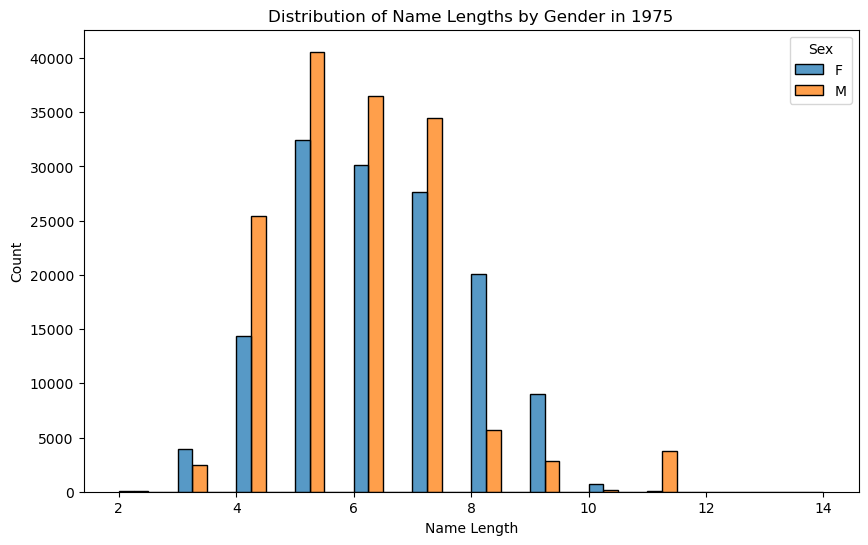

In [107]:
plt.figure(figsize=(10, 6))
sns.histplot(data=expanded_data, x='name_length', hue='Sex', multiple='dodge', binwidth=0.5)

plt.xlabel('Name Length')
plt.ylabel('Count')
plt.title(f'Distribution of Name Lengths by Gender in {target_year}')
plt.show()

## 6. Visualizing Logistic Regression Predictions

Finally, we’ll plot the observed proportions and the logistic regression curve to visualize the probability of a name being female based on its length.

,name_length,predicted_probability_female
0,2,0.331629
1,3,0.366048
2,4,0.401890
3,5,0.438813
4,6,0.476426
5,7,0.514309
6,8,0.552027
7,9,0.589157
8,10,0.625298
9,11,0.660094


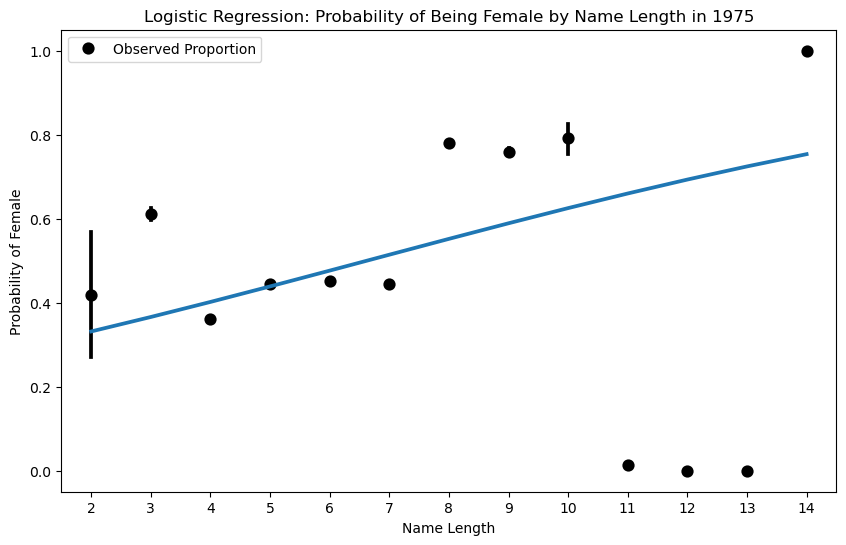

In [108]:
plt.figure(figsize=(10, 6))

# # Logistic regression curve
# plt.plot(predicted_data['name_length'], predicted_data['predicted_probability_female'], color='blue', linewidth=2, label='Logistic Regression')

# Observed proportion of female names by name length
sns.pointplot(
    data=expanded_data,
    x='name_length',
    y='gender_binary',
    estimator='mean',
    errorbar=('ci', 99),
    label='Observed Proportion',
    color='black',
    markers="o",
    linestyles=""
)

display(predicted_data)
sns.pointplot(data=predicted_data, x='name_length', y='predicted_probability_female',markers=None)

# Labels and title
plt.xlabel('Name Length')
plt.ylabel('Probability of Female')
plt.title(f'Logistic Regression: Probability of Being Female by Name Length in {target_year}')
plt.legend()
plt.show()

In [ ]:

expanded_data[expanded_data['name_length']>10]['Name'].unique()  # Filter for names with length greater than 1